# Chaîne d'oscillateurs aléatoires

On modélise $N>3$ oscillateurs couplés non-linéairement aux plus
proches voisins le long d'une chaîne circulaire (conditions aux bords
périodiques).

L'Hamiltonien s'écrit:
$$
H(p_1,\dots,p_N, q_1,\dots,q_N)\,=\,\sum_{n=1}^N\Bigl(\frac
12(p_n^2+k_nq_n^2)+\frac \lambda 4(q_n-q_{n-1})^4\Bigr)~,
$$
où $q_0=q_N$.

Reprendre le programme de la série 2 et le modifier pour
correspondre à la situation décrite ci-dessus:

 * Ne garder que l'intégrateur "Störmer-Verlet",
 * Faire un ensemble de $N$ oscillateurs, chacun couplé à ses 2 voisins comme décrit par $H$, avec $k_n$ un nombre aléatoire uniforme dans [0.5, 5].
 * Initialiser à $t=0$ chaque oscillateur avec $p_n=0$ et $q_n$ aléatoire de distribution normale et intégrer jusqu'à $t=T$.
 * Utiliser les options de la ligne de commande pour choisir $N$, $T$, $\delta t$, $\lambda$ et essayer plusieurs valeurs différentes, sauver les résultats dans des fichiers.
  * Ecrire les paramètre aléatoires $\lambda,k_1, \dots,k_N$ sur la première ligne du fichier de sortie (avant $t=0$), pour pouvoir les utiliser dans l'analyse.


## Visualiser les résultats

Prendre par exemple $N=20$, $t=50$ et $\lambda\in\{0,0.5,1\}$ et représenter les résultats à l'aide de [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). 

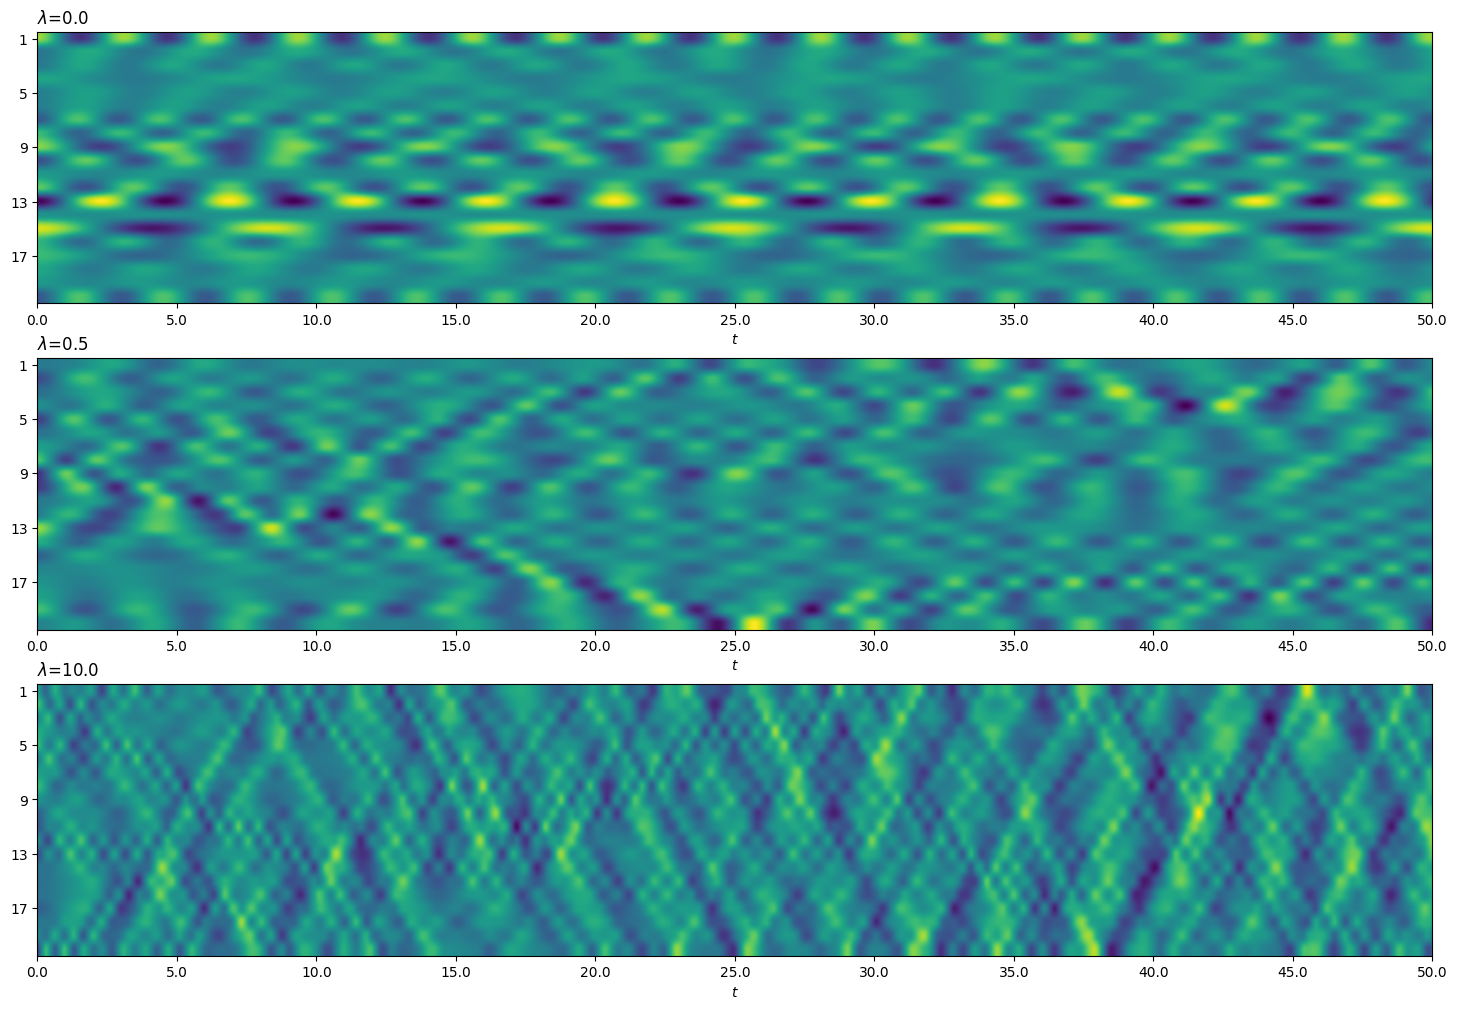

In [1]:
import numpy as np
import matplotlib.pyplot as plt

files = ["output_0.txt", "output_5.txt", "output_10.txt"]
oscillo = np.loadtxt(files[0])
osize = oscillo.shape[1]
tt = oscillo[1:,0]
tlen = len(tt)
nidx = np.arange(1, osize, 2)
tidx = np.arange(0, tlen, 500)
oidx = np.arange(0, len(nidx), 4)
lmbda = np.zeros(len(files))
kpars = np.zeros(shape=(len(files), len(nidx)))
qq = np.zeros(shape=(len(files), tlen, len(nidx)))
pp = np.zeros(shape=(len(files), tlen, len(nidx)))

for n, f in enumerate(files):
    oscillo = np.loadtxt(f)
    lmbda[n] = oscillo[0,0]
    kpars[n,:] = oscillo[0,nidx]
    qq[n,:,:] = oscillo[1:,nidx]
    pp[n,:,:] = oscillo[1:,1+nidx]    


fig, ax = plt.subplots(len(files), 1, figsize=(18,12))

for n,lb in enumerate(lmbda):
    ax[n].imshow(np.transpose(qq[n,:,:]), aspect='auto')
    ax[n].set_xticks(tidx, tt[tidx])
    ax[n].set_yticks(oidx, 1+oidx)
    ax[n].set_xlabel("$t$")
    ax[n].set_title(f"$\lambda$={lb}", loc='left')

plt.show()

Calculer pour chaque oscillateur sa variable d'angle $\theta$ (voir série 2) et la représenter en fonction de $t$ (se limiter à ~10 oscillateurs pour la lisibilité du graphique).

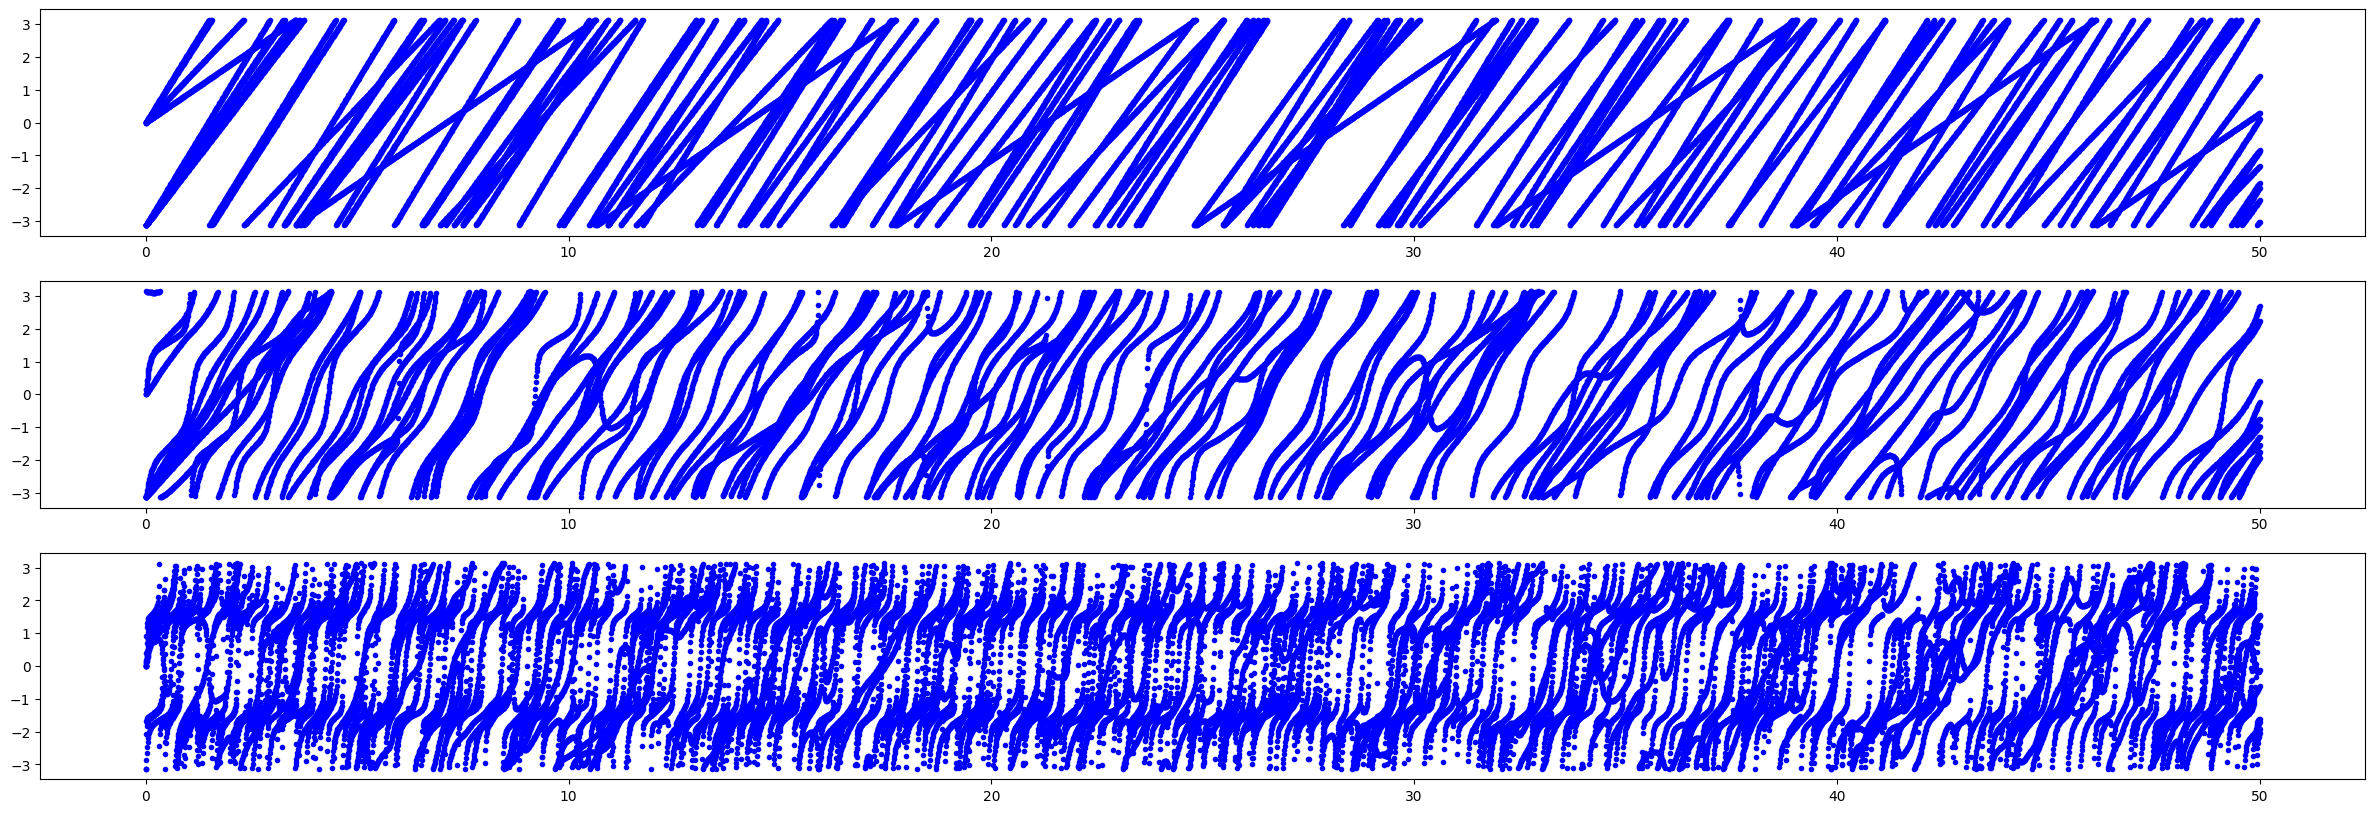

In [2]:
fig, ax = plt.subplots(len(files), 1, figsize=(30,10))

for n,lb in enumerate(lmbda):
    theta = -np.arctan2(pp[n,:,:], np.sqrt(kpars[n,:])*qq[n,:,:])
    ax[n].plot(np.repeat([tt], 10, axis=0), np.transpose(theta[:,:10]),'b.')
                
plt.show()